In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
data = pd.read_csv("casos_keywords_complete - Hoja 1.csv")

In [4]:
data.head()

,fecha,casos,tos,dolor de garganta,fiebre,cansancio,dolor de cabeza,suma_keys_sintomas,IF,tengo covid,sintomas covid,test covid,suma_keys_preguntas,depresion,ansiedad,suma_keys_consequencias
0,1/1/20,1,18,3,16,3,9,49,NaN,0,0,0,0,20,45,65
1,2/1/20,0,14,4,14,2,8,42,NaN,0,0,0,0,23,53,76
2,3/1/20,1,21,8,16,4,4,53,NaN,0,0,0,0,27,42,69
3,4/1/20,0,18,4,14,2,7,45,NaN,0,0,0,0,24,49,73
4,5/1/20,0,12,4,13,1,9,39,0.0,0,0,0,0,28,49,77


In [5]:
sintomas = data["suma_keys_sintomas"]

In [7]:
sintomas.head()

0    49
1    42
2    53
3    45
4    39
Name: suma_keys_sintomas, dtype: int64

In [8]:
casos = data["casos"]

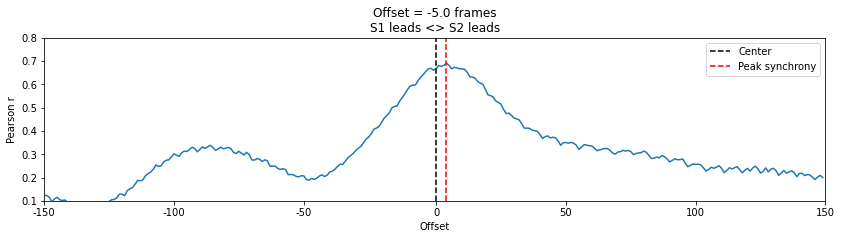

In [25]:
def crosscorr(datax, datay, lag=0, wrap=False):
    """ Lag-N cross correlation. 
    Shifted data filled with NaNs 
    
    Parameters
    ----------
    lag : int, default 0
    datax, datay : pandas.Series objects of equal length
    Returns
    ----------
    crosscorr : float
    """
    if wrap:
        shiftedy = datay.shift(lag)
        shiftedy.iloc[:lag] = datay.iloc[-lag:].values
        return datax.corr(shiftedy)
    else: 
        return datax.corr(datay.shift(lag))

d1 = data["suma_keys_sintomas"]
d2 = data["casos"]
seconds = 5
fps = 30
rs = [crosscorr(d1,d2, lag) for lag in range(-int(seconds*fps),int(seconds*fps+1))]
offset = np.floor(len(rs)/2)-np.argmax(rs)
f,ax=plt.subplots(figsize=(14,3))
ax.plot(rs)
ax.axvline(np.ceil(len(rs)/2),color='k',linestyle='--',label='Center')
ax.axvline(np.argmax(rs),color='r',linestyle='--',label='Peak synchrony')
ax.set(title=f'Offset = {offset} frames\nS1 leads <> S2 leads',ylim=[.1,.80],xlim=[0,301], xlabel='Offset',ylabel='Pearson r')
ax.set_xticks([0, 50, 100, 151, 201, 251, 301])
ax.set_xticklabels([-150, -100, -50, 0, 50, 100, 150]);
plt.legend()

/opt/anaconda3/envs/ironhack/lib/python3.8/site-packages/numpy/lib/function_base.py:2634: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/opt/anaconda3/envs/ironhack/lib/python3.8/site-packages/numpy/lib/function_base.py:2493: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


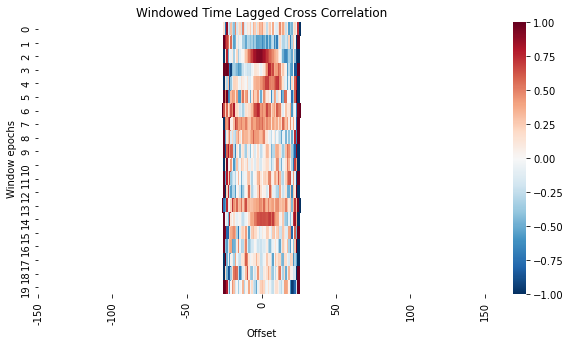

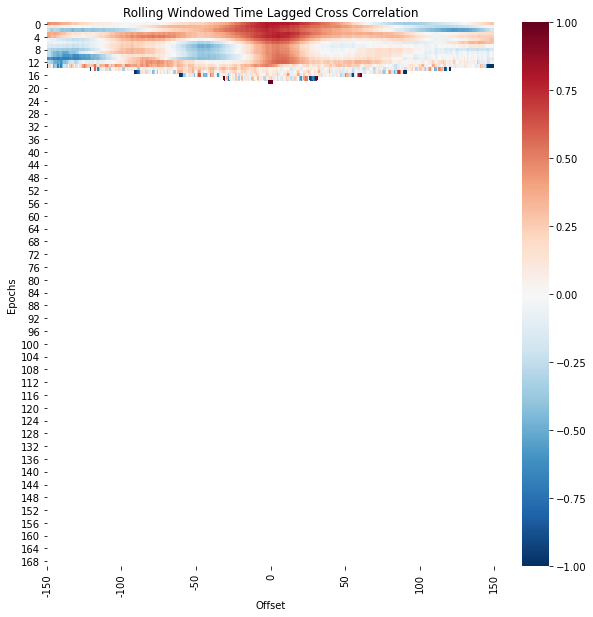

In [18]:
# Windowed time lagged cross correlation
seconds = 5
fps = 30
no_splits = 20
samples_per_split = data.shape[0]/no_splits
rss=[]
for t in range(0, no_splits):
    d1 = data["suma_keys_sintomas"].loc[(t)*samples_per_split:(t+1)*samples_per_split]
    d2 = data["casos"].loc[(t)*samples_per_split:(t+1)*samples_per_split]
    rs = [crosscorr(d1,d2, lag) for lag in range(-int(seconds*fps),int(seconds*fps+1))]
    rss.append(rs)
rss = pd.DataFrame(rss)
f,ax = plt.subplots(figsize=(10,5))
sns.heatmap(rss,cmap='RdBu_r',ax=ax)
ax.set(title=f'Windowed Time Lagged Cross Correlation',xlim=[0,301], xlabel='Offset',ylabel='Window epochs')
ax.set_xticks([0, 50, 100, 151, 201, 251, 301])
ax.set_xticklabels([-150, -100, -50, 0, 50, 100, 150]);

# Rolling window time lagged cross correlation
seconds = 5
fps = 30
window_size = 300 #samples
t_start = 0
t_end = t_start + window_size
step_size = 30
rss=[]
while t_end < 5400:
    d1 = data["suma_keys_sintomas"].iloc[t_start:t_end]
    d2 = data["casos"].iloc[t_start:t_end]
    rs = [crosscorr(d1,d2, lag, wrap=False) for lag in range(-int(seconds*fps),int(seconds*fps+1))]
    rss.append(rs)
    t_start = t_start + step_size
    t_end = t_end + step_size
rss = pd.DataFrame(rss)

f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(rss,cmap='RdBu_r',ax=ax)
ax.set(title=f'Rolling Windowed Time Lagged Cross Correlation',xlim=[0,301], xlabel='Offset',ylabel='Epochs')
ax.set_xticks([0, 50, 100, 151, 201, 251, 301])
ax.set_xticklabels([-150, -100, -50, 0, 50, 100, 150]);

ValueError: The number of FixedLocator locations (7), usually from a call to set_ticks, does not match the number of ticklabels (3).

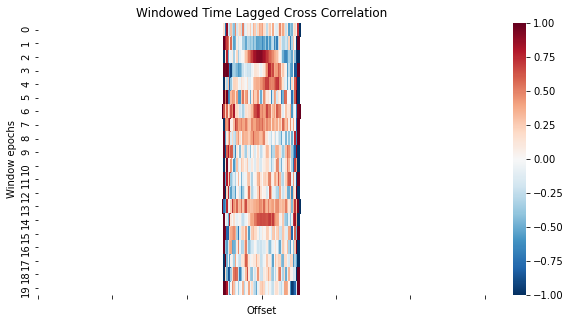

In [21]:
seconds = 5
fps = 30
no_splits = 20
samples_per_split = data.shape[0]/no_splits
rss=[]
for t in range(0, no_splits):
    d1 = data["suma_keys_sintomas"].loc[(t)*samples_per_split:(t+1)*samples_per_split]
    d2 = data["casos"].loc[(t)*samples_per_split:(t+1)*samples_per_split]
    rs = [crosscorr(d1,d2, lag) for lag in range(-int(seconds*fps),int(seconds*fps+1))]
    rss.append(rs)
rss = pd.DataFrame(rss)
f,ax = plt.subplots(figsize=(10,5))
sns.heatmap(rss,cmap="RdBu_r",ax=ax)
ax.set(title=f"Windowed Time Lagged Cross Correlation",xlim=[0,301], xlabel="Offset",ylabel="Window epochs")
ax.set_xticks([0, 50, 100, 151, 201, 251, 301])
ax.set_xticklabels([-150, -100, -50, 0, 50, 100, 150]);

In [20]:
from dtw import dtw,accelerated_dtw

d1 = data["suma_keys_sintomas"].interpolate().values
d2 = data["casos"].interpolate().values
d, cost_matrix, acc_cost_matrix, path = accelerated_dtw(d1,d2, dist='euclidean')

plt.imshow(acc_cost_matrix.T, origin='lower', cmap='gray', interpolation='nearest')
plt.plot(path[0], path[1], 'w')
plt.xlabel('Subject1')
plt.ylabel('Subject2')
plt.title(f'DTW Minimum Path with minimum distance: {np.round(d,2)}')
plt.show()

ModuleNotFoundError: No module named 'dtw'